In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
from Map import Map
from Tabu import Tabu
from TwoStage import TwoStage
from L_shaped import MasterProblem as mp
import matplotlib.pyplot as plt
import matplotlib.pylab as pl 
import matplotlib.cm as cm
import time
import networkx as nx
import matplotlib as mpl

**Modelling Parameters**

In [3]:
rides = 5
bus = 1
scenarios = 25
MIPGap = 0.001
probability = [0.7, 0.1, 0.15, 0.05]

**Defining the Map**

In [4]:
mappy = Map(rides)

def Mod3():
    t3 = time.time()
    lshaped = mp(
        mappy,
        bus=bus,
        scenarios=scenarios,
#         probability=probability
    )
    lshaped.initialize()
    lshaped.model.params.MIPGap = MIPGap
    lshaped.optimize()
    t3 = time.time() - t3
    return lshaped, t3

**Plotting Functions**

In [5]:
def plot_trend(ub,lb,base):
    x = list(range(len(ub)))
    figure = plt.figure()
    plt.plot(x,ub,label='upper-bound')
    plt.plot(x,[base]*len(ub),label='two-stage')
    plt.plot(x,lb,label='lower-bound')
    plt.annotate(int(ub[-1]),[x[-1],ub[-1]])
    plt.legend()
    plt.savefig('./figures/trend.png')
    plt.show()

colors = ['green','blue','yellow','red','pink'] 
def displaygraph(n, e, modname):
    for k in e.keys():
        for i, j in e[k]:
            plt.plot((n[i][0],n[j][0]),(n[i][1],n[j][1]), color=colors[k] ,marker='o', linewidth=2, linestyle='dashed')
    for i in n:
        plt.annotate(i,n[i],textcoords="offset points",xytext=(0,10),ha='center')
    plt.savefig('./figures/'+modname+'.png')
    plt.show()


In [6]:
lshaped = mp(mappy, bus=bus, scenarios=scenarios)
lshaped.initialize()
lshaped.optimize()

Using license file C:\Users\lavkeshg\gurobi.lic
Academic license - for non-commercial use only
Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter NodefileStart to 0.5
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Presolve to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Parameter Heuristics unchanged
   Value: 0.05  Min: 0.0  Max: 1.0  Default: 0.05
-73.33230631182596 -8.894132000000017
63.85392488672663 -0.5842494250993155
-68.66652689562943 -7.202689999999988
61.3038531446517 -0.15998375097774442
-65.18302050001512 -7.69211905001866
58.7705820771816 1.2796806271851437
-59.099887127946204 -6.236673185740636
55.30174667137381 2.4385327291682444
-52.37823253396687 -6.417772268117353
50.02114677715364 4.0606865113041195
-25.192609961277117 -2.198749492456355
31.63021942059409 8.636358951773328
-25.406973590678838 -2.30247

for model in lshaped.submodel.values():
    print(model.relaxmod.status)
lshaped.submodel[1].relaxmod.computeIIS()
lshaped.submodel[1].relaxmod.write('./Reports/IIS/Infeasible.ilp')

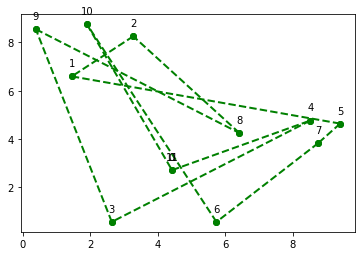

({0: (4.42986490392226, 2.690427087376892),
  1: (1.4600799221373484, 6.59001498048031),
  2: (3.280993946327475, 8.256975828710063),
  3: (2.6439208077136698, 0.5388357165300128),
  4: (8.52774664185043, 4.7533721327711564),
  5: (9.412350917124254, 4.6262609223838025),
  6: (5.746326208784382, 0.5375615095983477),
  7: (8.764686524955787, 3.8167632146088772),
  8: (6.42697445052931, 4.234756844090077),
  9: (0.3915760658950451, 8.550912800854025),
  10: (1.9058218886242195, 8.757679121047522),
  11: (4.42986490392226, 2.690427087376892)},
 {0: [(7, 6),
   (6, 10),
   (0, 4),
   (8, 2),
   (2, 1),
   (1, 5),
   (5, 7),
   (9, 8),
   (3, 9),
   (10, 0),
   (4, 3)]},
 [1, 2, 3, 4, 5])

In [8]:
nodes = mappy.node
edges = {k:[] for k in range(lshaped.bus)}
for i, j in lshaped.parameters.edges:
    for k in range(lshaped.bus):
        if lshaped.variables.x[i,j,k].X > 0.5:
            if j != lshaped.last:
                edges[k].append((i,j))
            else:
                edges[k].append((i,0))
bounds = lshaped.getcancel()
objlshaped = lshaped.model.ObjVal
displaygraph(nodes, edges,'L-Shaped')
nodes,edges,bounds

In [ ]:
plot_trend(lshaped.upperbounds[1:],lshaped.lowerbounds[1:],0)

In [ ]:
lshaped.printsol(lshaped.submodel)

In [ ]:
(sum(lshaped.variables.h[i,j].X for i,j in lshaped.variables.h.keys()),
sum(lshaped.variables.p_l[j].X for j in lshaped.variables.p_l.keys()))

In [ ]:
lshaped.submodel[3].sim.alpha